In [1]:
"""Adapted from code written by Fabian Pedregosa and Alexandre Gramfort: https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lars.html#sphx-glr-auto-examples-linear-model-plot-lasso-lars-py
"""

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets

Computing regularization path using the LARS ...
.

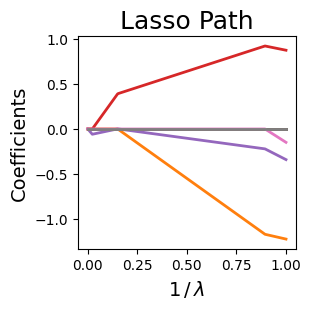

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets

# X, y = datasets.load_diabetes(return_X_y=True)

# generate random under-determined dataset
d = 8
n = 4
group_size = 2
group_shape = (int(d / group_size), group_size)

X = np.random.normal(size=(n, d))
w_opt = np.random.normal(size=(d))
y = X @ w_opt

print("Computing regularization path using the LARS ...")
_, _, coefs = linear_model.lars_path(X, y, method="lasso", verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(3.2, 3.2))
plt.plot(xx, coefs.T, linewidth=2)
ymin, ymax = plt.ylim()
# plt.vlines(xx, ymin, ymax, linestyle="dashed")
plt.xlabel("$1 \, / \, \lambda$", fontsize=14)
plt.ylabel("Coefficients", fontsize=14)
plt.title("Lasso Path", fontsize=18)
plt.tight_layout()
plt.savefig("lasso_path.pdf")

In [3]:
from r_fista.fista import fista
from r_fista.loss_fns import get_squared_error_closures
from r_fista.regularizers import GroupL1Regularizer, L2Regularizer

In [4]:
n, d = X.shape
obj_fn_w, grad_fn_w = get_squared_error_closures(X, y)

In [5]:
print(group_shape)
print(n,d)

(4, 2)
4 8


In [6]:
w_list = []
proj_norms = []
full_proj_norms = []
lambdas = []
diffs = []

w0 = np.zeros(d) # five groups of two features
lam = 10
regularizer=GroupL1Regularizer(lam, group_shape)

# initial model should be fully sparse
# w, _ = fista(w0, obj_fn, grad_fn, regularizer, 1.0, 0.8, 1000, 1e-8, log_freq=1, verbose=False)
# w_list.append(w)
# w = w.reshape(5,2)
# group_norms = np.sqrt(np.sum(w**2, axis=-1))
# nnz = np.sum(group_norms != 0)

for delta in np.logspace(-4, 3, 8):
    for i in range(1000): 
        obj_fn = lambda w: obj_fn_w(w) + delta * np.sum(w ** 2) / 2
        grad_fn = lambda w: grad_fn_w(w) + delta * w

        lam = lam * 0.95
        lambdas.append(lam)
        regularizer=GroupL1Regularizer(lam, group_shape)
        w, _ = fista(w0, obj_fn, grad_fn, regularizer, 1.0, 0.8, 10000, 1e-10, log_freq=1, verbose=False)
        inz = w != 0
        X_active = X[:, inz]
        Z = X_active.T @ X_active
        Z_full = X.T @ X

        row_proj = Z @ np.linalg.pinv(Z) @ w[inz]
        null_proj = w[inz] - row_proj
        
        row_proj = row_proj.reshape(-1, group_size)
        w_groups = w.reshape(-1, group_size)
        corr = lam * (row_proj / np.sqrt(np.sum(row_proj ** 2, axis=-1, keepdims=True)))
        w_groups = w.reshape(-1, group_size)
        corr_full = lam * (w_groups / np.sqrt(np.sum(w_groups ** 2, axis=-1, keepdims=True)))
        diff = np.linalg.norm((corr_full.reshape(-1)[inz] - corr.reshape(-1)))
        diffs.append(diff)
        
        print(row_proj - w[inz].reshape(-1, group_size), "\n", diff)
        
        null_proj_full = w - Z_full @ np.linalg.pinv(Z_full) @ w

        proj_norms.append(np.linalg.norm(null_proj, 2))
        full_proj_norms.append(np.linalg.norm(null_proj_full, 2))

        w_list.append(w)
        w = w.reshape(d,1)
        group_norms = np.sqrt(np.sum(w**2, axis=-1))
        nnz = np.sum(group_norms != 0)
        if nnz == d:
            break

Termination criterion satisfied at iteration 0/10000. Exiting optimization loop.
[] 
 0.0
Termination criterion satisfied at iteration 0/10000. Exiting optimization loop.
[] 
 0.0
Termination criterion satisfied at iteration 0/10000. Exiting optimization loop.
[] 
 0.0
Termination criterion satisfied at iteration 0/10000. Exiting optimization loop.
[] 
 0.0
Termination criterion satisfied at iteration 0/10000. Exiting optimization loop.
[] 
 0.0
Termination criterion satisfied at iteration 0/10000. Exiting optimization loop.
[] 
 0.0
Termination criterion satisfied at iteration 0/10000. Exiting optimization loop.
[] 
 0.0
Termination criterion satisfied at iteration 0/10000. Exiting optimization loop.
[] 
 0.0
Termination criterion satisfied at iteration 0/10000. Exiting optimization loop.
[] 
 0.0
Termination criterion satisfied at iteration 0/10000. Exiting optimization loop.
[] 
 0.0
Termination criterion satisfied at iteration 0/10000. Exiting optimization loop.
[] 
 0.0
Terminatio

/var/folders/13/xgr448m97vx1n3r4sdlkqjz40000gn/T/ipykernel_28929/1087999447.py:39: RuntimeWarning: invalid value encountered in divide
  corr_full = lam * (w_groups / np.sqrt(np.sum(w_groups ** 2, axis=-1, keepdims=True)))


Termination criterion satisfied at iteration 59/10000. Exiting optimization loop.
[[ 0.02538155 -0.02975248]
 [ 0.05143816 -0.07286125]
 [-0.06449318  0.0717365 ]] 
 0.2014442438994998
Termination criterion satisfied at iteration 61/10000. Exiting optimization loop.
[[ 0.02575248 -0.03021025]
 [ 0.05215126 -0.07403732]
 [-0.06562031  0.07309566]] 
 0.1891290308413145
Termination criterion satisfied at iteration 64/10000. Exiting optimization loop.
[[ 0.0260876  -0.03063423]
 [ 0.05277804 -0.07515021]
 [-0.06672217  0.07446424]] 
 0.17788549528549097
Termination criterion satisfied at iteration 71/10000. Exiting optimization loop.
[[ 0.02638668 -0.03102402]
 [ 0.05331822 -0.0761987 ]
 [-0.06779728  0.07584009]] 
 0.16757332771365935
Termination criterion satisfied at iteration 77/10000. Exiting optimization loop.
[[ 0.02664769 -0.03137743]
 [ 0.05376739 -0.07717785]
 [-0.06884194  0.07721991]] 
 0.15807762574878434
Termination criterion satisfied at iteration 80/10000. Exiting optimizat

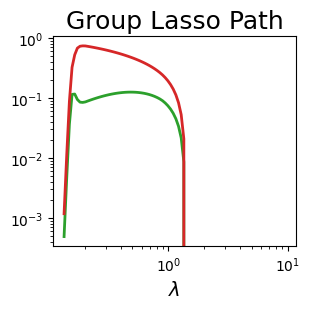

In [7]:
coefs = np.array(w_list).T
xx = np.sum(np.abs(coefs.T), axis=1)
plt.figure(figsize=(3.2, 3.2))
plt.loglog(lambdas, coefs.T, linewidth=2)
# plt.xlim((0.00000001, 2.5))
# plt.vlines(xx, ymin, ymax, linestyle="dashed")
plt.xlabel("$\lambda$", fontsize=14)
# plt.ylabel("Coefficidents", fontsize=14)
plt.title("Group Lasso Path", fontsize=18)
plt.tight_layout()
plt.savefig("group_lasso_path.pdf")

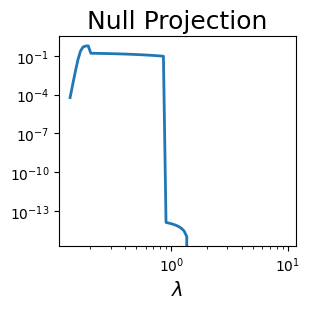

In [8]:
plt.figure(figsize=(3.2, 3.2))
plt.loglog(lambdas, proj_norms, linewidth=2)
ymin, ymax = plt.ylim()
# plt.xlim((0.00000001, 2.5))

plt.xlabel("$\lambda$", fontsize=14)
plt.title("Null Projection", fontsize=18)
plt.tight_layout()
plt.savefig("proj_values.pdf")

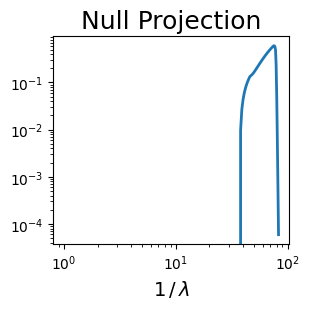

In [9]:
plt.figure(figsize=(3.2, 3.2))
plt.loglog(np.arange(len(full_proj_norms)), full_proj_norms, linewidth=2)
ymin, ymax = plt.ylim()
plt.xlabel("$1 \, / \, \lambda$", fontsize=14)
plt.title("Null Projection", fontsize=18)
plt.tight_layout()
plt.savefig("proj_values.pdf")

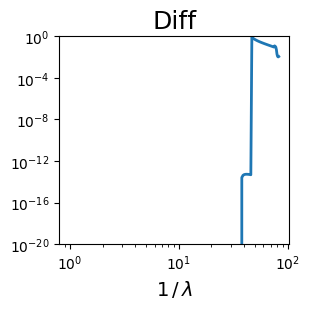

In [10]:
plt.figure(figsize=(3.2, 3.2))
plt.loglog(np.arange(len(diffs)), diffs, linewidth=2)
ymin, ymax = plt.ylim()
plt.xlabel("$1 \, / \, \lambda$", fontsize=14)
plt.ylim((1e-20, 1))
plt.title("Diff", fontsize=18)
plt.tight_layout()
plt.savefig("proj_values.pdf")